# Solution of partial differential equations (PDEs)
---

### Modules

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Definition 1: PDEs
Partial differential equations are differential equations involving funtions of more than one independent variable.

## Finite difference (Heat Equation)
---
In the finite difference method the idea is to replace the continuous PDE
by a discrete algebraic problem that can be solved on a computer in finitely
many steps.

Consider heat equation
$$u_t = \alpha \ u_{xx} + f(x, t), \ \ \ \ \ \ t > 0, \ \ \ \ 0 < x < 1;$$
with the following boundary and initial conditions
$$u(0, t) = g_0(t)$$
$$u(1, t) = g_1(t)$$
$$u(x, 0) = u_0(x)$$

There are many approximations with finite difference here we are going to see the explicit and implicit method.

### Explicit method
---
We start by defining a grid in the spatial variable $x$ as following
$$0 = x_0 < x_1 < x_2 < . . . < x_{N-1} = 1$$
and we assume, for simplicity, that the mesh spacing is uniform, that is $x_k - x_{k-1} = h$ for all $k$.  
Define a time step $\Delta t >0$, and a time grid by $t_n = n \Delta t$ for $n >0$. Then, at each point in our space-time grid we can define difference approximations to the derivatives, thus

$$u_t(x, t) = \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} + e_1$$

$$u_{xx}(x, t) = \frac{u(x-h, t) - 2u(x, t) + u(x+h, t)}{h^2} + e_2$$

where $e_1, e_2$ are the errors since the above equations are approximations


[Finite difference explanation](https://en.wikipedia.org/wiki/Finite_difference)

Then, if we rewrite the heat equations it will be as follows

$$\frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} = \alpha \ \frac{u(x-h, t) - 2u(x, t) + u(x+h, t)}{h^2} + f(x, t) + E$$

where $E = e_2 - e_1$

We now define our approximation solution without the error of approximation and taking $u_{i}^{n} = u(x_i, t_n)$

$$\frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} = \alpha \ \frac{u_{i-1}^{n} - 2u_{i}^{n} + u_{i+1}^{n}}{h^2} + f(x_i, t_n)$$

which can be simplified

$$ u_{i}^{n+1} = u_{i}^{n} +  \frac{\alpha \Delta t }{h^2} (u_{i-1}^{n} - 2u_{i}^{n} + u_{i+1}^{n}) + \Delta t f(x_i, t_n)$$

In [3]:
%%html
<img src = 'https://people.eecs.berkeley.edu/~demmel/cs267/lecture17/DiscreteHeat.gif'>

In [224]:
def explicit_finite_difference(g0, g1, u0, h_, dt_, alpha_, f):
    
    h = h_
    dt = dt_
    alpha = alpha_
    
    N = int(1 / dt) + 1
    X = int(1 / h) + 1
    
    t = np.arange(0, 1 + dt, dt)
    x = np.arange(0, 1 + h, h)
    
    u = np.zeros((N, X))
    
    u[0] = u0(x)
    
    for n in range(N-1):
        u[n+1, 0], u[n+1, X-1] = g0, g1
        for i in range(1, X-1):
            u[n+1, i] = u[n, i] + ( ( ( alpha * dt ) / h**2 ) * ( u[n, i-1] - 2* u[n, i] + u[n, i+1] ) ) + dt*f(i, n) 
            
    
    return u, x, t
    
def plot_surface(u, x, t):
    
    fig = plt.figure()
    ax = Axes3D(fig)
    
    surf = ax.plot_surface(x, t, u, cmap=cm.coolwarm)
    ax.set_xlabel('x: Space')
    ax.set_ylabel('t: Time')
    ax.set_zlabel('u: Temperatue')

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

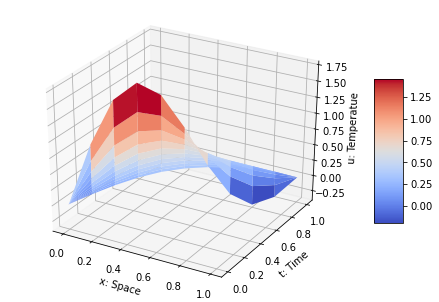

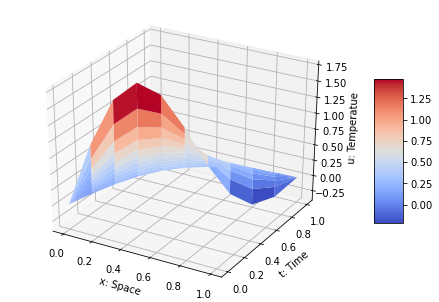

In [225]:
g0, g1, h, dt, a = 0, 0, 0.1, 0.1, 0.1
u0 = lambda x: np.sin(np.pi*x) + np.sin(2*np.pi*x)
f = lambda i, n: 0

u_r = lambda x, t: np.exp(-t)*np.sin(np.pi*x) + np.exp(-4*t)*np.sin(2*np.pi*x)


# Finite difference solution of u 
u_p, x, t = explicit_finite_difference(g0, g1, u0, h, dt, a, f)
plot_surface(u_p, x, t)

# Analytical solution of u
X, T = np.meshgrid(x, t)
plot_surface(u_r(X, T), x, t)


### Implicit method
---
The time-step restriction in the explicit method can be removed by using a very alightly different set of difference approximation in contructing the numerical method, that is, considering $u_t, u_{xx}$ as

$$u_t(x, t) = \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} + e_1$$

$$u_{xx}(x, t) = \frac{u(x-h, t + \Delta t) - 2u(x, t + \Delta t) + u(x+h, t + \Delta t)}{h^2} + e_2$$

where $e_1, e_2$ are the errors since the above equations are approximations


Then, after replace the above equations to the heat equation, without taking into account the errors, we obtain the following

$$\frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} = \alpha \ \frac{u(x-h, t + \Delta t) - 2u(x, t + \Delta t) + u(x+h, t + \Delta t)}{h^2} + f(x, t)$$

$$\frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} = \alpha \ \frac{u_{i-1}^{n+1} - 2u_{i}^{n+1} + u_{i+1}^{n+1}}{h^2} + f(x_i, t_{n+1})$$


which can be simplified

$$ u_{i}^{n+1}= u_{i}^{n} +  \frac{\alpha \Delta t }{h^2} (u_{i-1}^{n+1} - 2u_{i}^{n+1} + u_{i+1}^{n+1}) + \Delta t f(x_i, t_{n+1})$$

$$ - \left(\frac{\alpha \Delta t }{h^2}\right) u_{i-1}^{n+1} + \left(1 + \frac{2\alpha \Delta t }{h^2} \right) u_{i}^{n+1} - \left(\frac{\alpha \Delta t }{h^2}\right) u_{i+1}^{n+1} = u_{i}^{n} + \Delta t f(x_i, t_{n+1})$$

this is a tridiagonal system of $N-1$ equations in the $N-1$ unknown $u_{1}^{n+1}, u_{2}^{n+1}, ..., u_{N-1}^{n+1}$.

Consider the case $n = 0$ and $\beta = \frac{\alpha \Delta t }{h^2}$

$ \begin{bmatrix}
 (1 + 2\beta) u_{1}^{1}, & -\beta u_{2}^{1} \\ 
 -\beta u_{1}^{1}, & (1 + 2\beta) u_{2}^{1}, & -\beta u_{3}^{1} \\
 & -\beta u_{2}^{1}, & (1 + 2\beta) u_{3}^{1}, & -\beta u_{4}^{1} \\
 & & -\beta u_{m-1}^{1}, & (1 + 2\beta) u_{m}^{1}, & -\beta u_{m+1}^{1}\\
\end{bmatrix} = \begin{bmatrix}
   u_{1}^{0} \\ 
  u_{2}^{0} \\
  u_{3}^{0} \\
  u_{m}^{0} \\
\end{bmatrix} = \begin{matrix}
   i=1\\ 
  i=2\\
  i=3\\
  i=m\\
\end{matrix}$

In [159]:
%%html
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQL9WEVChVVO6scJzw49ycZR8gLTXu0WKVBCFbZfznebraP2Ewl&usqp=CAU' width="800" height="800">

In [226]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def solve_system(A, b):
    x = np.linalg.solve(A, b[1:])
    return np.asarray([0] + list(x))

def implicit_finite_difference(g0, g1, u0, h_, dt_, alpha_, f):
    
    h = h_
    dt = dt_
    alpha = alpha_
    beta = ( alpha * dt ) / h**2
    
    N = int(1 / dt) + 1
    X = int(1 / h) + 1
    
    t = np.arange(0, 1 + dt, dt)
    x = np.arange(0, 1 + h, h)
    
    u = np.zeros((N, X))
    u[0] = u0(x)
    
    a, b, c = (-beta)*np.ones(N-2), (1+(2*beta))*np.ones(N-1), (-beta)*np.ones(N-2)
    A = tridiag(a, b, c)
    
    for n in range(N-1):
        u[n+1] = solve_system(A, u[n])
        for i in range(1, X-1):
            u[n+1, i] = u[n, i] + ( beta * ( u[n+1, i-1] - 2* u[n+1, i] + u[n+1, i+1] ) ) + dt*f(i, n+1) 
            
    return u, x, t

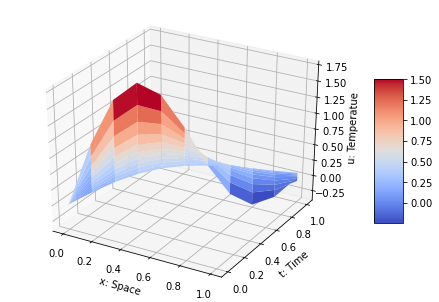

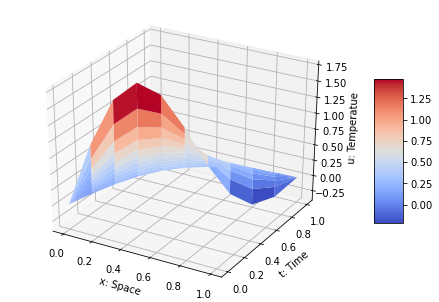

In [245]:
g0, g1, h, dt, a = 0, 0, 0.1, 0.1, 0.1
u0 = lambda x: np.sin(np.pi*x) + np.sin(2*np.pi*x)
f = lambda i, n: 0
u_r = lambda x, t: np.exp(-t)*np.sin(np.pi*x) + np.exp(-4*t)*np.sin(2*np.pi*x)


# Finite difference solution of u 
u_p, x, t = implicit_finite_difference(g0, g1, u0, h, dt, a, f)
plot_surface(u_p, x, t)

# Analytical solution of u
X, T = np.meshgrid(x, t)
plot_surface(u_r(X, T), x, t)

## Finite elements (Heat Equation)
---

* Numerical analysis burden
* An introduction to numerical methods ans analysis James F. Epperson

## Heat equation in polar systems
---

We start by writting the heat equation

$$u_t = \alpha \ u_{xx} + f(x, t), \ \ \ \ \ \ t > 0, \ \ \ \ 0 < x < 1;$$

in cylindric coordinates

$$u_t = \alpha (u_{rr} + \frac{1}{r} u_{\phi} + \frac{1}{r^2} u_{\phi^2})$$

with the following boundary and initial conditions
$$u(0, \phi, t) = g_0(t)$$
$$u(1, \phi, t) = g_1(t)$$
$$u(r, 0, t) = g_2(t)$$
$$u(r, 1, t) = g_3(t)$$
$$u(r, \phi, 0) = u_0(x)$$


Now, we find the difference approximation for each derivative

$$u_t(r, \phi, t) = \frac{u(r, \phi, t + \Delta t) - u(r, \phi, t)}{\Delta t} + e_1$$

$$u_{rr}(r, \phi, t) = \frac{u(r - \Delta r, \phi, t) - 2u(r, \phi, t) + u(r + \Delta r, \phi, t)}{h^2} + e_2$$

$$u_{\phi}(r, \phi, t) = \frac{u(r, \phi + \Delta \phi, t) - u(r, \phi, t)}{h^2} + e_2$$

$$u_{\phi \phi}(r, \phi, t) = \frac{u(r, \phi - \Delta \phi, t) - 2u(r, \phi, t) + u(r, \phi + \Delta \phi, t)}{h^2} + e_2$$



Then we replace the above equations into the original equation, without taking the errors, and take $u_{i, j}^{n} = u(r, \phi, t)$

$$u_{i, j}^{n+1} = u_{i, j}^{n} + \frac{\alpha \Delta t}{h^2} ((u_{i-1, j}^{n} - 2*u_{i, j}^{n} + u_{i+1, j}^{n}) + \frac{1}{r} (u_{i, j+1}^{n} - u_{i, j}^{n} ) + \frac{1}{r^2} (u_{i, j-1}^{n} - 2*u_{i, j}^{n} + u_{i, j+1}^{n})$$


In [240]:
def explicit_finite_difference_polar_coodinates(g0, g1, g2, g3, u0, dt_, dr_, dp_, a_):
    
    dt = dt_
    dr = dr_
    dp = dp_
    a = a_
    beta = (k * dt) / h**2 
    
    N = int(1 / dt) + 1
    R = int(1 / dr) + 1
    P = int(1 / dp) + 1
    
    t = np.arange(0, 1 + dt, dt)
    r = np.arange(0, 1 + dr, dr)
    p = np.arange(0, 1 + dp, dp)
    
    u = np.zeros((N, R, P))
    
    
    for n in range(N-1):
        u[n, 0] = u0(x)
        for i in range(1, R-1):
            u[n+1, i, 0], u[n+1, i, P-1] = g0, g1
            for j in range(1, P-1):
                u[n+1, i, j] = u[n, i, j] + ( beta * ( (u[n, i-1, j] -2* u[n, i, j]  + u[n, i+1, j]) + \
                                                      ( (1/i) *(u[n, i,j+1] -u[n, i,j]) ) + 
                                                       ( (1/i**2) *(u[n, i,j-1] -2*u[n, i,j] + u[n, i,j+1]) ) ) )
             
    
    return u, r, p, t

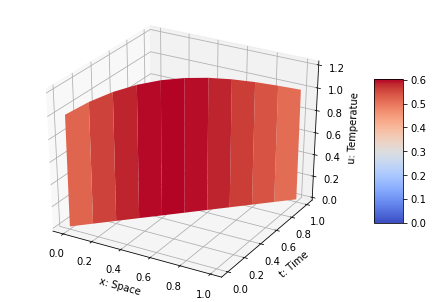

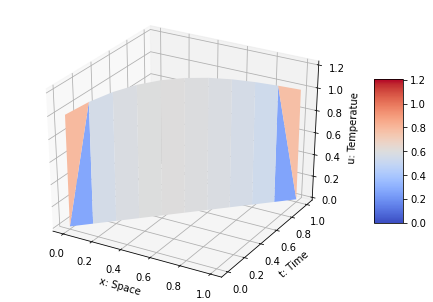

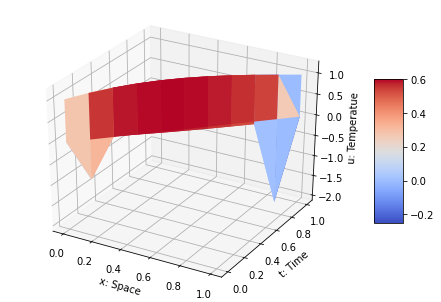

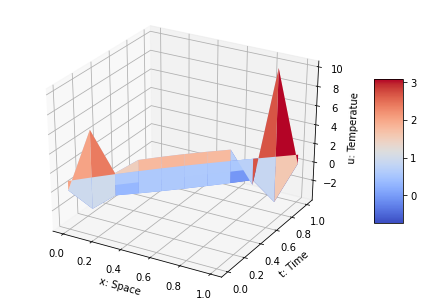

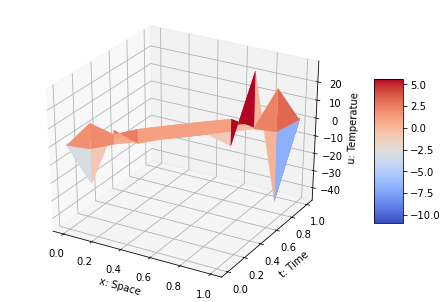

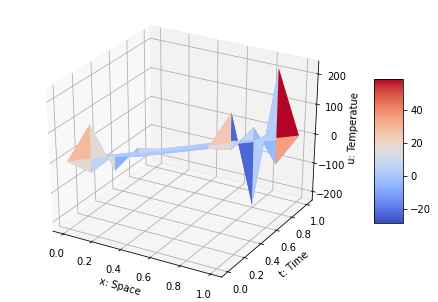

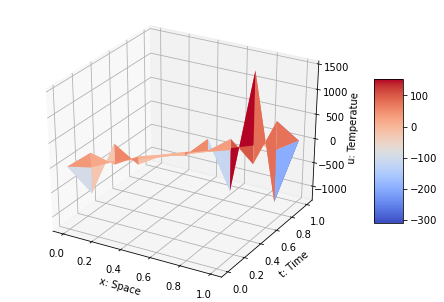

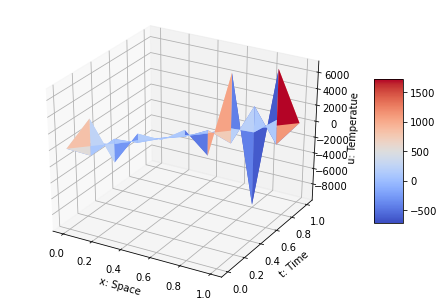

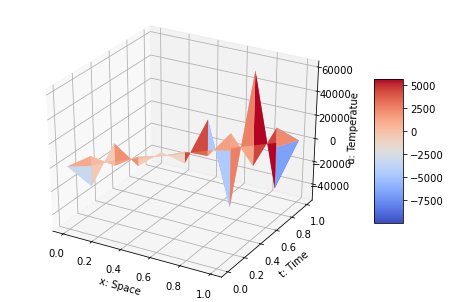

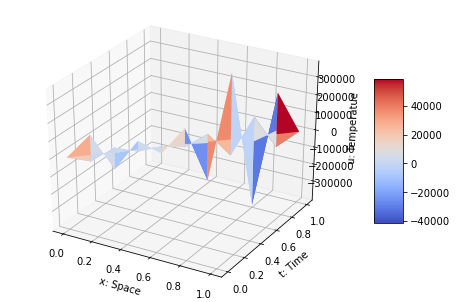

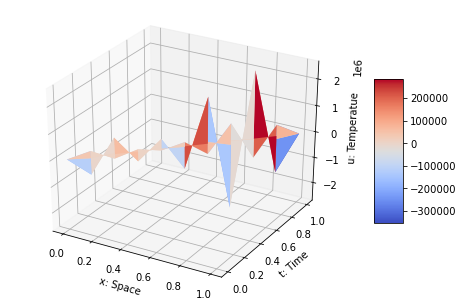

In [243]:
g0, g1, g2, g3, dt, dr, dp, a = 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.2
u0 = lambda x:np.cos(np.pi*x/2) + x

# Finite difference solution of u 
u_p, r, p, t = explicit_finite_difference_polar_coodinates(g0, g1, g2, g3, u0, dt, dr, dp, a)

for i in range(len(t)):
    plot_surface(u_p[i], r, p)


## Navier-Stokes Equations
---

Navier-Stokes equations are named after two physicists, Claude Louis Navier and George Gabriel Stokes, French and Irish respectively, who applied principles of thermodynamics, aiming at nonlinear partial differential equations that manage to describe the behavior of a fluid.

They are equations that are not concentrated in one position but in a velocity field, more specifically in the flow of the velocity field, which is the description of the fluid's velocity at a given point in time and space.

First, we define the components of the equations. 

### Components of the equation
* $\overrightarrow{u} := $ this term is the fluid's velocity vector.
* $\rho := $ this term is the density of the fluid.
* $P := $ this term refers to the pressure of force that the fluid exerts.
* $g := $ All forces that are exerted to the fluid.
* $\mu := $ this term refers to the kinematic viscosity.

## Equation

$$\rho \left ( \frac{ \partial \overrightarrow{u}}{\partial t} + \overrightarrow{u} \cdot \bigtriangledown \overrightarrow{u} \right) = - \bigtriangledown P + \lambda \bigtriangledown (\bigtriangledown \cdot \overrightarrow{u}) + \mu \Delta \overrightarrow{u}+ f(x, t)\ $$

However, when the fluid is incomprehensible but slimy, the above equation is simplified pretty much, since it fullfills the following conditions
* $\frac{d\rho}{dt} = 0$
* $\bigtriangledown \cdot u = 0$
* $f(x, t) = 0$

Then, the equation is simplied as follows

$$ k \bigtriangledown^2 \overrightarrow{u} - \overrightarrow{u} \bigtriangledown \overrightarrow{u} - \bigtriangledown P  = \frac{ \partial \overrightarrow{u}}{\partial t}\ $$

with $k = \mu / \rho$

### Velocity of the fluid equation

$$ \frac{ \partial \overrightarrow{u}}{\partial t} = k \frac{ \partial^2}{\partial x^2}u_j - u_i \cdot  \frac{ \partial}{\partial x} u_j - \frac{\partial}{\partial x} P \ \ \ \ \ \ \ u_j = \{u_x, u_y, u_z\}$$

We are going to consider the equation in one dimesion then If we're going to define the velocity vector as follows $$\overrightarrow{u} = u_j = \{u_x, u_y, u_z\}$$

$$ \frac{ \partial }{\partial t}u = k \frac{ \partial^2}{\partial x^2}u -  \frac{ \partial}{\partial x} u^2 - \frac{\partial}{\partial x} P$$

$$ u_t = k u_{xx} -  u_{x}^{2} - P_x$$

with the following boundary and initial conditions

$$u(0, t) = g_0(t)$$
$$u(1, t) = g_1(t)$$
$$u(x, 0) = u_0(x)$$

Now, we're going to apply the difference explicit method. So, consider the difference approximation of the derivatives:

$$u_t(x, t) = \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} + e_1$$

$$u_{x}^{2}(x, t) = \frac{u^2(x + h, t) - u^2(x, t)}{\Delta t} + e_2$$

$$P(x)(x, t) = \frac{u(x + h, t) - u(x, t)}{\Delta t} + e_3$$

$$u_{xx}(x, t) = \frac{u(x-h, t) - 2u(x, t) + u(x+h, t)}{h^2} + e_4$$

with $e_1, e_2, e_3, e_4$ the errors of the approximations.

Hence, if we rewrite the Navier-Stokes equation, without the errors, we obtain the following

$$ \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} = k \cdot \frac{u(x-h, t) - 2u(x, t) + u(x+h, t)}{h^2} - \frac{u^2(x + h, t) - u^2(x, t)}{h^2} - \frac{u(x + h, t) - u(x, t)}{h^2}$$

Now, take $u(x_i, t_n) = u_{i}^{n}$

$$ \frac{u_{i}^{n+1}- u_{i}^{n}}{\Delta t} = k \cdot \frac{u_{i-1}^{n} - 2u_{i}^{n} + u_{i+1}^{n}}{h^2} - \frac{(u^2)_{i+1}^{n} - (u^2)_{i}^{n}}{h^2} - \frac{u_{i+1}^{n} - u_{i}^{n}}{h^2} $$

and we solve for $u_i^{n+1}$

$$u_{i}^{n+1} = u_{i}^{n} + \frac{k \Delta t}{h^2} \left ( u_{i-1}^{n} - u_{i}^{n} - (u^2)_{i+1}^{n} + (u^2)_{i}^{n}  \right )$$

In [197]:
def explicit_finite_difference_navier_stokes(g0, g1, u0, h_, dt_, k_):
    
    h = h_
    dt = dt_
    k = k_
    beta = (k * dt) / h**2 
    
    N = int(1 / h) + 1
    X = int(1 / dt) + 1
    
    t = np.arange(0, 1 + dt, dt)
    x = np.arange(0, 1 + h, h)
    
    u = np.zeros((N, X))
    u[0] = u0(x)
    
    for n in range(N-1):
        u[n+1, 0], u[n+1, X-1] = g0, g1
        for i in range(1, X-1):
            u[n+1, i] = u[n, i] + ( beta * ( u[n, i-1] - u[n, i]  - u[n, i+1]**2 + u[n, i]**2 ) )
             
    
    return u, x, t

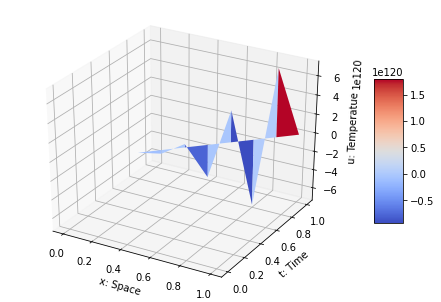

In [232]:
g0, g1, h, dt, k = 0, 0, 0.1, 0.1, 0.1
u0 = lambda x:np.cos(np.pi*x/2) + x

# Finite difference solution of u 
u_p, x, t = explicit_finite_difference_navier_stokes(g0, g1, u0, h, dt, a)

plot_surface(u_p, x, t)
